In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from scipy.stats import kurtosis
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from datasets.HiggsBosonDataset import HiggsBosonDataset
from datasets.MappingDataset import MappingDataset
%load_ext autoreload
%autoreload 2
from utils import *

# Higgs Boson Dataset
---

In [181]:
higgs = HiggsBosonDataset()
X, y = higgs.get_train_data()

## Principal Component Analysis

Component	Explained	Cumulative
1		0.24		0.24
2		0.13		0.37
3		0.11		0.47
4		0.09		0.56
5		0.08		0.64
6		0.07		0.70
7		0.06		0.76
8		0.05		0.81
9		0.04		0.85
10		0.04		0.89
11		0.03		0.92
12		0.02		0.94
13		0.02		0.96
14		0.01		0.98
15		0.01		0.99
16		0.01		0.99
17		0.00		1.00
18		0.00		1.00


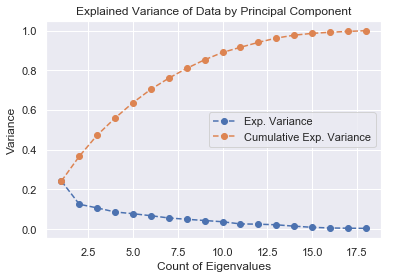

In [15]:
#Analyze Explained variance by number of features
pca = PCA()
pca.fit(X)

evars = pca.explained_variance_ratio_
cumsum_evars = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(pca.n_components_)+1,evars, '--o',  label='Exp. Variance')
plt.plot(np.arange(pca.n_components_)+1,cumsum_evars, '--o', label='Cumulative Exp. Variance')
plt.xlabel('Count of Eigenvalues')
plt.ylabel('Variance')
plt.title('Explained Variance of Data by Principal Component')
plt.legend()
plt.savefig('../images/pca_higgs_expvar.png')

print('Component\tExplained\tCumulative')
for n, evar, cumsum_evar in zip(np.arange(pca.n_components_)+1,evars,cumsum_evars):
    print('%d\t\t%.2f\t\t%.2f'%(n,evar,cumsum_evar))

Kurtosis of Eigenvalues: 3.204


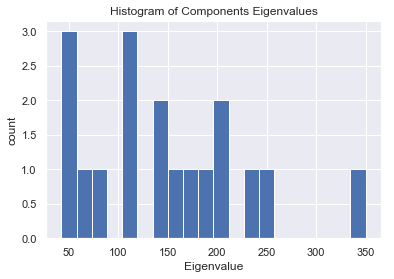

In [94]:
print('Kurtosis of Eigenvalues: %.3f' % (kurtosis(pca.singular_values_, fisher=False)))
plt.hist(pca.singular_values_, bins=20)
plt.xlabel('Eigenvalue')
plt.ylabel('count')
plt.title('Histogram of Components Eigenvalues')
plt.show()ther

Explained Var: 1.00	 MSE: 98395.549
Explained Var: 2.00	 MSE: 90666.442
Explained Var: 3.00	 MSE: 83116.691
Explained Var: 4.00	 MSE: 75208.947
Explained Var: 5.00	 MSE: 68947.921
Explained Var: 6.00	 MSE: 60968.418
Explained Var: 7.00	 MSE: 53801.607
Explained Var: 8.00	 MSE: 48445.710
Explained Var: 9.00	 MSE: 41768.577
Explained Var: 10.00	 MSE: 36292.961
Explained Var: 11.00	 MSE: 30775.484
Explained Var: 12.00	 MSE: 25127.083
Explained Var: 13.00	 MSE: 19015.918
Explained Var: 14.00	 MSE: 14633.579
Explained Var: 15.00	 MSE: 11239.022
Explained Var: 16.00	 MSE: 8602.696
Explained Var: 17.00	 MSE: 4959.680
Explained Var: 18.00	 MSE: 0.000


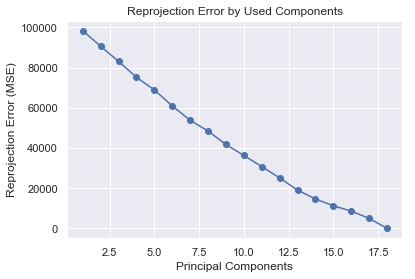

In [185]:
variances = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])
comps = np.arange(1,X.shape[1]+1,1)
reproj_error = list()
rows_higgs_pca= []
fit_times = list()
for var in comps:
    
    pca = PCA(n_components = var)
    mse = calculate_reprojection_error(X, pca)
    reproj_error.append(mse)
    print('Explained Var: %.2f\t MSE: %.3f'%(var, mse))
    rows_higgs_pca.append([var, mse, 0, 'pca'])
plt.plot(comps,reproj_error, '-o')
plt.xlabel('Principal Components')
plt.ylabel('Reprojection Error (MSE)')
plt.title('Reprojection Error by Used Components')
plt.savefig('../images/higgs_pca_reproj_error.png')


Text(0.5, 0, 'Principal Components')

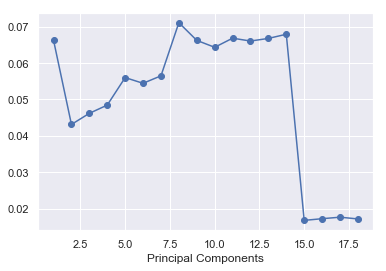

In [148]:
#Fit Time by number of Components
comps = np.arange(1,X.shape[1]+1,1)
reproj_error = list()
rows_pca= []
fit_times = list()
for var in comps:    
    pca = PCA(n_components = var)
    start = timer()
    pca.fit(X)
    
    fit_times.append(timer() - start)

plt.plot(comps,fit_times, '-o')
plt.xlabel('Principal Components')


Text(0.5, 0, 'Principal Components')

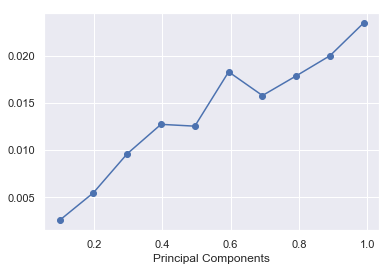

In [151]:
#Fit Time by train size
comps = np.linspace(0.1,.99,10)
pca = PCA()
fit_times = list()
for var in comps:    
    _, X_test, _, _ = train_test_split(X, y, test_size=var)

    start = timer()
    pca.fit(X_test)
    fit_times.append(timer() - start)

plt.plot(comps,fit_times, '-o')
plt.xlabel('Principal Components')

Explained Var: 0.10	 MSE: 98395.548
Explained Var: 0.20	 MSE: 98395.548
Explained Var: 0.30	 MSE: 90666.454
Explained Var: 0.40	 MSE: 83116.693
Explained Var: 0.50	 MSE: 75208.948
Explained Var: 0.60	 MSE: 68947.921
Explained Var: 0.70	 MSE: 60968.418
Explained Var: 0.80	 MSE: 48445.710
Explained Var: 0.90	 MSE: 30775.484
Explained Var: 0.99	 MSE: 8602.696


Text(0.5, 1.0, 'Reprojection Error by Variance of Projection')

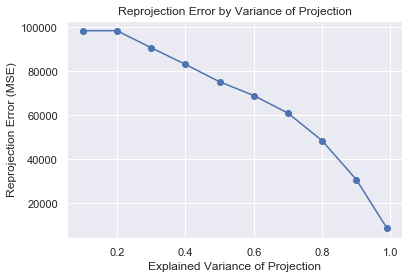

In [29]:
variances = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])
reproj_error = list()
for var in variances:
    pca = PCA(n_components = var)
    mse = calculate_reprojection_error(X, pca)
    reproj_error.append(mse)
    print('Explained Var: %.2f\t MSE: %.3f'%(var, mse))
    
plt.plot(variances,reproj_error, '-o')
plt.xlabel('Explained Variance of Projection')
plt.ylabel('Reprojection Error (MSE)')
plt.title('Reprojection Error by Variance of Projection')


## Iterative Component Analysis

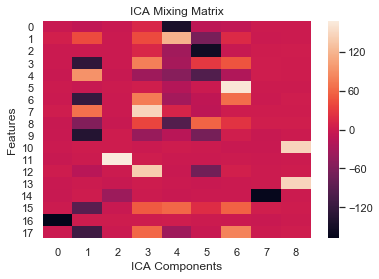

In [74]:
ica = FastICA(9)
x_trans = ica.fit_transform(X)
sns.heatmap(ica.mixing_)
plt.title('ICA Mixing Matrix')
plt.xlabel('ICA Components')
plt.ylabel('Features')
plt.savefig('../images/higgs_mixing_matrix.png',bbox='tight')

Avg Kurtosis of X: 2.64
Avg Kurtosis: 3.34


Text(0.5, 1.0, 'Kurtosis of Projected Axis: ICA')

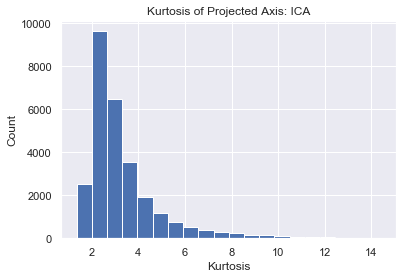

In [36]:
print('Avg Kurtosis of X: %.2f' % (np.mean(kurtosis(X, axis=1, fisher=False))))
kurt = kurtosis(x_trans, axis=1, fisher=False)
print('Avg Kurtosis: %.2f' % (np.mean(kurt)))
plt.hist(kurt,bins=20)
plt.xlabel('Kurtosis')
plt.ylabel('Count')
plt.title('Kurtosis of Projected Axis: ICA')

In [32]:
num_comps = np.arange(1,X.shape[1]+1,1)
kurts = list()
for n in num_comps:
    ica = FastICA(n)
    x_trans = ica.fit_transform(X)
    kurts.append(np.mean(kurtosis(x_trans, axis=1, fisher=False)))
    

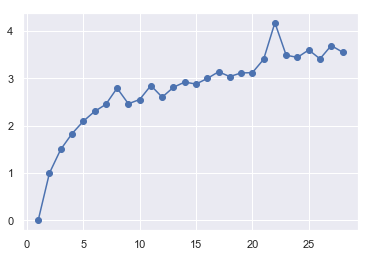

In [46]:
plt.plot(num_comps, kurts,'-o')

Text(0.5, 0, 'Principal Components')

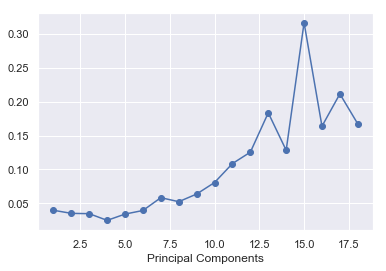

In [152]:
#Fit Time by number of Components
comps = np.arange(1,X.shape[1]+1,1)
reproj_error = list()
rows_pca= []
fit_times = list()
for var in comps:    
    ica = FastICA(n_components = var)
    start = timer()
    ica.fit(X)
    
    fit_times.append(timer() - start)

plt.plot(comps,fit_times, '-o')
plt.xlabel('Principal Components')


Text(0.5, 0, 'Principal Components')

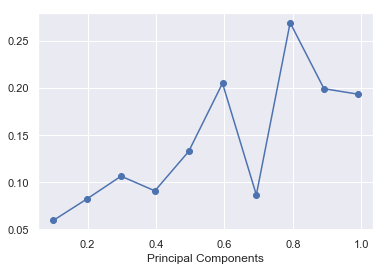

In [155]:
#Fit Time by train size
comps = np.linspace(0.1,.99,10)
ICA = FastICA()
fit_times = list()
for var in comps:    
    _, X_test, _, _ = train_test_split(X, y, test_size=var)

    start = timer()
    ica.fit(X_test)
    fit_times.append(timer() - start)

plt.plot(comps,fit_times, '-o')
plt.xlabel('Principal Components')

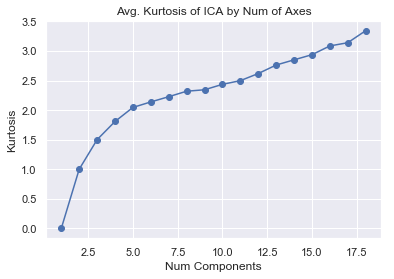

In [33]:
plt.plot(num_comps, kurts,'-o')
plt.title('Avg. Kurtosis of ICA by Num of Axes')
plt.xlabel('Num Components')
plt.ylabel('Kurtosis')
plt.savefig('../images/higgs_ica_kurtosis.png')

## Randomized Projection

In [144]:
ran = GaussianRandomProjection()

In [186]:
iters = 1000
rows_higgs_rand = list()
for n in np.arange(1,X.shape[1]+1,1):
    reproj_error = list()
    for _ in range(iters):
        ran = GaussianRandomProjection(n_components=n)
        x_trans = ran.fit_transform(X)
        mse = calculate_reprojection_error(X, ran,random=True)
        reproj_error.append(mse)
    rows_higgs_rand.append([n, np.mean(reproj_error), np.std(reproj_error),'rand'])

In [187]:
rows = rows_higgs_pca + rows_higgs_rand

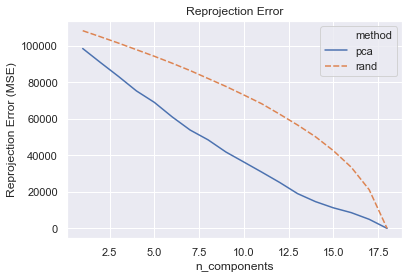

N	Mean		Std	Method
1	98395.55	0.00	pca
2	90666.44	0.00	pca
3	83116.69	0.00	pca
4	75208.95	0.00	pca
5	68947.92	0.00	pca
6	60968.42	0.00	pca
7	53801.61	0.00	pca
8	48445.71	0.00	pca
9	41768.58	0.00	pca
10	36292.96	0.00	pca
11	30775.48	0.00	pca
12	25127.08	0.00	pca
13	19015.92	0.00	pca
14	14633.58	0.00	pca
15	11239.02	0.00	pca
16	8602.70	0.00	pca
17	4959.68	0.00	pca
18	0.00	0.00	pca
1	108151.41	966.85	rand
2	104795.15	1392.17	rand
3	101358.70	1732.74	rand
4	97763.28	1948.38	rand
5	94156.38	2231.07	rand
6	90343.85	2397.73	rand
7	86339.88	2540.57	rand
8	81999.20	2731.76	rand
9	77657.12	2871.70	rand
10	72982.33	2952.90	rand
11	68173.45	3138.37	rand
12	62470.18	3379.83	rand
13	56551.63	3532.56	rand
14	50137.12	3653.63	rand
15	42507.57	3641.32	rand
16	33437.64	3497.31	rand
17	21161.64	3168.10	rand
18	0.00	0.00	rand


In [188]:
df = pd.DataFrame(rows,columns=['n_components','mean_mse','std_mse','method'])
ax = sns.lineplot(x='n_components',y='mean_mse', hue = 'method', style='method', data=df)
plt.ylabel('Reprojection Error (MSE)')
plt.title('Reprojection Error')
plt.legend()
plt.savefig('../images/higgs_reproj_error.png')
plt.show()

print('N\tMean\t\tStd\tMethod')
for row in rows:
    
    print('%d\t%.2f\t%.2f\t%s' % (row[0],row[1],row[2],row[3]))

## TreeBased Feature Selection Model

In [11]:
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X,y)

In [12]:
selector = SelectFromModel(clf, prefit=True)
X_trans = selector.transform(X)

(28125, 7)


Text(0.5, 1.0, 'Feature Importance on Higgs Dataset')

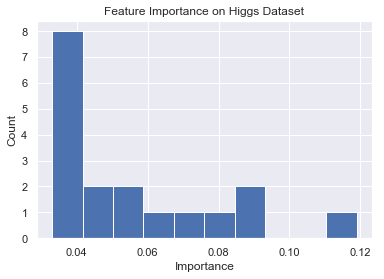

In [200]:
plt.hist(clf.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Count')
plt.title('Feature Importance on Higgs Dataset')

Text(0, 0.5, 'Importance')

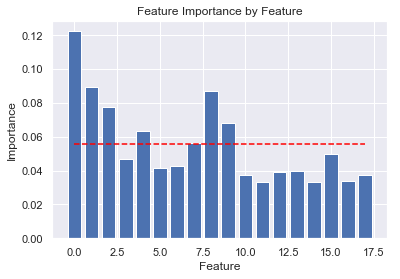

In [23]:
plt.bar(np.arange(len(clf.feature_importances_)),clf.feature_importances_)
plt.plot(np.arange(len(clf.feature_importances_)),[np.mean(clf.feature_importances_)]*len(clf.feature_importances_),'--',label='mean',color='red')
plt.title('Feature Importance by Feature')
plt.xlabel('Feature')
plt.ylabel('Importance')

# Mapping Dataset
---

In [190]:
mapping = MappingDataset()
X, y = mapping.get_train_data()

In [54]:
X.shape

(10545, 28)

## Principal Component Analysis

Component	Explained	Cumulative
1		0.26		0.26
2		0.12		0.39
3		0.07		0.45
4		0.06		0.51
5		0.04		0.55
6		0.04		0.59
7		0.03		0.62
8		0.03		0.65
9		0.03		0.68
10		0.03		0.71
11		0.02		0.73
12		0.02		0.76
13		0.02		0.78
14		0.02		0.80
15		0.02		0.82
16		0.02		0.84
17		0.02		0.86
18		0.02		0.87
19		0.02		0.89
20		0.02		0.91
21		0.02		0.92
22		0.01		0.94
23		0.01		0.95
24		0.01		0.96
25		0.01		0.98
26		0.01		0.99
27		0.01		1.00
28		0.00		1.00


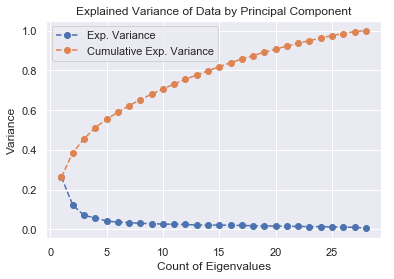

In [24]:
#Analyze Explained variance by number of features
pca = PCA()
pca.fit(X)

evars = pca.explained_variance_ratio_
cumsum_evars = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(pca.n_components_)+1,evars, '--o',  label='Exp. Variance')
plt.plot(np.arange(pca.n_components_)+1,cumsum_evars, '--o', label='Cumulative Exp. Variance')
plt.xlabel('Count of Eigenvalues')
plt.ylabel('Variance')
plt.title('Explained Variance of Data by Principal Component')
plt.legend()
plt.savefig('../images/pca_ndvi_expvar.png')

print('Component\tExplained\tCumulative')
for n, evar, cumsum_evar in zip(np.arange(pca.n_components_)+1,evars,cumsum_evars):
    print('%d\t\t%.2f\t\t%.2f'%(n,evar,cumsum_evar))

Kurtosis of Eigenvalues: 9.935


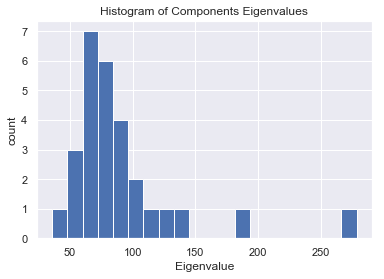

In [10]:
print('Kurtosis of Eigenvalues: %.3f' % (kurtosis(pca.singular_values_, fisher=False)))
plt.hist(pca.singular_values_, bins=20)
plt.xlabel('Eigenvalue')
plt.ylabel('count')
plt.title('Histogram of Components Eigenvalues')
plt.show()

Explained Var: 1.00	 MSE: 47232.548
Explained Var: 2.00	 MSE: 42578.786
Explained Var: 3.00	 MSE: 40020.255
Explained Var: 4.00	 MSE: 37870.106
Explained Var: 5.00	 MSE: 36168.719
Explained Var: 6.00	 MSE: 34678.009
Explained Var: 7.00	 MSE: 33184.623
Explained Var: 8.00	 MSE: 31826.679
Explained Var: 9.00	 MSE: 30506.427
Explained Var: 10.00	 MSE: 29208.475
Explained Var: 11.00	 MSE: 27928.396
Explained Var: 12.00	 MSE: 26633.437
Explained Var: 13.00	 MSE: 25413.172
Explained Var: 14.00	 MSE: 24156.445
Explained Var: 15.00	 MSE: 22885.471
Explained Var: 16.00	 MSE: 21550.007
Explained Var: 17.00	 MSE: 20215.158
Explained Var: 18.00	 MSE: 18893.623
Explained Var: 19.00	 MSE: 17582.874
Explained Var: 20.00	 MSE: 16145.050
Explained Var: 21.00	 MSE: 14712.500
Explained Var: 22.00	 MSE: 13227.210
Explained Var: 23.00	 MSE: 11637.831
Explained Var: 24.00	 MSE: 9874.500
Explained Var: 25.00	 MSE: 7909.167
Explained Var: 26.00	 MSE: 5749.178
Explained Var: 27.00	 MSE: 2713.962
Explained Var:

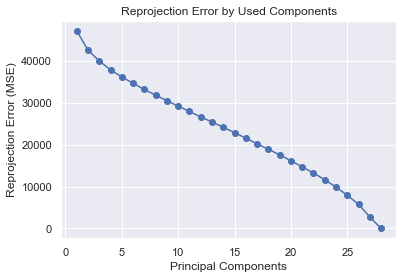

In [191]:
variances = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])
comps = np.arange(1,X.shape[1]+1,1)
reproj_error = list()
rows_map_pca= []
for var in comps:
    pca = PCA(n_components = var)
    mse = calculate_reprojection_error(X, pca)
    reproj_error.append(mse)
    print('Explained Var: %.2f\t MSE: %.3f'%(var, mse))
    rows_map_pca.append([var, mse, 0, 'pca'])   
    
plt.plot(comps,reproj_error, '-o')
plt.xlabel('Principal Components')
plt.ylabel('Reprojection Error (MSE)')
plt.title('Reprojection Error by Used Components')
plt.savefig('../images/ndvi_pca_reproj_error.png')


## Iterative Component Analysis

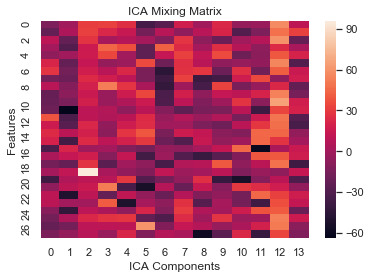

In [77]:
ica = FastICA(14,tol=0.2)
x_trans = ica.fit_transform(X)
sns.heatmap(ica.mixing_)
plt.title('ICA Mixing Matrix')
plt.xlabel('ICA Components')
plt.ylabel('Features')
plt.savefig('../images/nvdi_mixing_matrix.png',bbox='tight')

Avg Kurtosis of X: 2.63
Avg Kurtosis: 3.55


Text(0.5, 1.0, 'Kurtosis of Projected Axis: ICA')

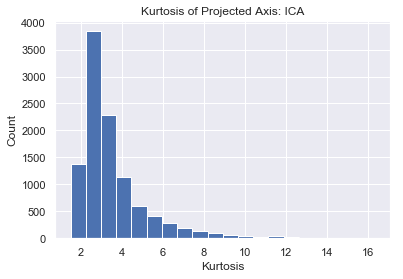

In [41]:
print('Avg Kurtosis of X: %.2f' % (np.mean(kurtosis(X, axis=1, fisher=False))))
x_trans = FastICA().fit_transform(X)
kurt = kurtosis(x_trans, axis=1, fisher=False)
kurt = kurtosis(x_trans, axis=1, fisher=False)
print('Avg Kurtosis: %.2f' % (np.mean(kurt)))
plt.hist(kurt,bins=20)
plt.xlabel('Kurtosis')
plt.ylabel('Count')
plt.title('Kurtosis of Projected Axis: ICA')

In [45]:
num_comps = np.arange(1,X.shape[1]+1,1)
kurts = list()
for n in num_comps:
    print(n)
    ica = FastICA(n,tol=0.2)
    x_trans = ica.fit_transform(X)
    kurts.append(np.mean(kurtosis(x_trans, axis=1, fisher=False)))
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


/Users/albutko/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


28


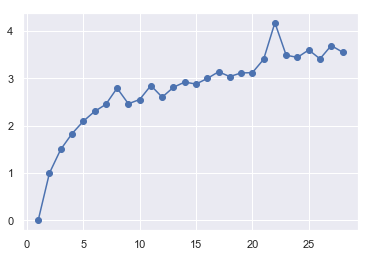

In [46]:
plt.plot(num_comps, kurts,'-o')

## Randomized Projection

In [48]:
ran = GaussianRandomProjection()

In [192]:
iters = 1000
rows_map_rand = list()
for n in range(1,X.shape[1]+1,1):
    for _ in range(iters):
        ran = GaussianRandomProjection(n_components=n)
        start = timer()
        ran.fit(X)
        x_trans = ran.transform(X)
        mse = calculate_reprojection_error(X, ran,random=True)
        reproj_error.append(mse)
    rows_map_rand.append([n, np.mean(reproj_error), np.std(reproj_error),'rand'])

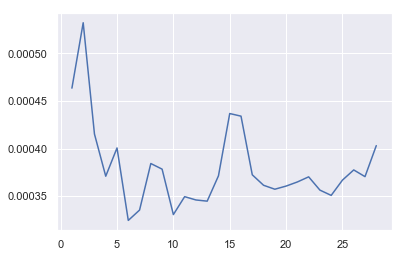

In [170]:
# Test Fit Time by number of components
iters = 1000
components = np.arange(1,X.shape[1]+1,1)
fit_times = list()
for n in components:
    n_fit_times = list()
    for _ in range(iters):
        ran = GaussianRandomProjection(n_components=n)
        start = timer()
        ran.fit(X)
        n_fit_times.append(timer()-start)
    fit_times.append(np.mean(n_fit_times))
plt.plot(components,fit_times)

In [193]:
rows = rows_map_pca + rows_map_rand

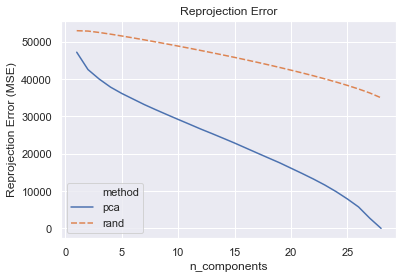

N	Mean		Std
1	47232.55	0.00
2	42578.79	0.00
3	40020.26	0.00
4	37870.11	0.00
5	36168.72	0.00
6	34678.01	0.00
7	33184.62	0.00
8	31826.68	0.00
9	30506.43	0.00
10	29208.47	0.00
11	27928.40	0.00
12	26633.44	0.00
13	25413.17	0.00
14	24156.45	0.00
15	22885.47	0.00
16	21550.01	0.00
17	20215.16	0.00
18	18893.62	0.00
19	17582.87	0.00
20	16145.05	0.00
21	14712.50	0.00
22	13227.21	0.00
23	11637.83	0.00
24	9874.50	0.00
25	7909.17	0.00
26	5749.18	0.00
27	2713.96	0.00
28	0.00	0.00
1	52999.85	5380.45
2	52896.66	3847.01
3	52520.54	3211.46
4	52072.55	2910.14
5	51579.59	2807.47
6	51073.36	2825.73
7	50542.78	2943.09
8	49997.24	3128.14
9	49440.81	3360.04
10	48873.18	3631.09
11	48294.12	3932.53
12	47698.44	4267.39
13	47092.13	4619.77
14	46474.69	4990.12
15	45846.88	5374.35
16	45196.20	5792.65
17	44533.03	6224.20
18	43852.96	6676.64
19	43149.88	7159.57
20	42423.38	7671.30
21	41680.87	8197.91
22	40907.91	8765.41
23	40094.41	9390.60
24	39245.55	10060.45
25	38345.62	10804.21
26	37375.37	11657.57
27	36302.96	126

In [194]:
# Reprojection Error
df = pd.DataFrame(rows,columns=['n_components','mean_mse','std_mse','method'])
ax = sns.lineplot(x='n_components',y='mean_mse', hue = 'method', style='method', data=df)
plt.ylabel('Reprojection Error (MSE)')
plt.title('Reprojection Error')
plt.legend()
plt.savefig('../images/ndvi_reproj_error.png')
plt.show()

print('N\tMean\t\tStd')
for row in rows:
    print('%d\t%.2f\t%.2f' % (row[0],row[1],row[2]))

In [52]:
iters = 100
rows = list()
for n in range(1,X.shape[1]+1):
    reproj_error = list()
    for _ in range(iters):
        ran = GaussianRandomProjection(n_components=n)
        x_trans = ran.fit_transform(X)
        mse = calculate_reprojection_error(X, ran,random=True)
        reproj_error.append(mse)
    rows.append([n, np.mean(reproj_error), np.std(reproj_error)])

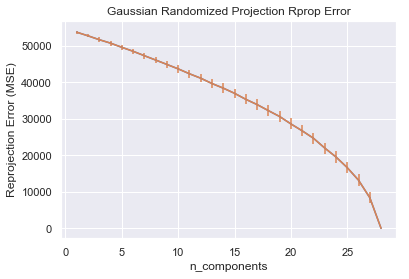

N	Mean		Std
1	53793.28	411.94
2	52802.49	417.99
3	51737.95	622.08
4	50790.52	682.13
5	49649.23	735.08
6	48564.35	675.20
7	47348.47	784.12
8	46164.43	931.43
9	44954.11	1024.86
10	43739.52	1048.45
11	42393.91	1035.59
12	41180.29	1122.91
13	39716.12	1294.25
14	38453.77	1443.84
15	37036.50	1251.32
16	35385.55	1367.56
17	33951.58	1446.75
18	32292.55	1449.43
19	30673.92	1381.07
20	28642.27	1506.58
21	26754.36	1504.78
22	24714.53	1562.82
23	22033.72	1505.44
24	19577.27	1624.09
25	16650.97	1591.04
26	13212.56	1668.76
27	8407.70	1432.23
28	0.00	0.00


In [53]:
df = pd.DataFrame(rows,columns=['n_components','mean_mse','std_mse'])
ax = sns.lineplot(x='n_components',y='mean_mse', ci='std_mse', data=df)
ax.errorbar(df.index+1, df['mean_mse'], df['std_mse'],fmt='-')
plt.ylabel('Reprojection Error (MSE)')
plt.title('Gaussian Randomized Projection Rprop Error')
plt.show()

print('N\tMean\t\tStd')
for row in rows:
    
    print('%d\t%.2f\t%.2f' % (row[0],row[1],row[2]))

## TreeBased Feature Selection Model

In [54]:
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X,y)

In [55]:
selector = SelectFromModel(clf, prefit=True)
X_trans = selector.transform(X)
print(X_trans.shape)

(10545, 8)


Text(0.5, 1.0, 'Feature Importance on Higgs Dataset')

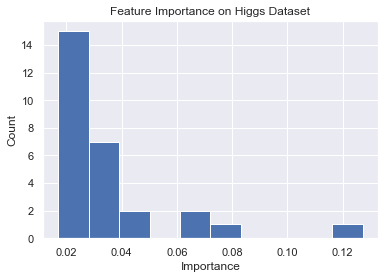

In [56]:
plt.hist(clf.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Count')
plt.title('Feature Importance on Higgs Dataset')

Text(0, 0.5, 'Importance')

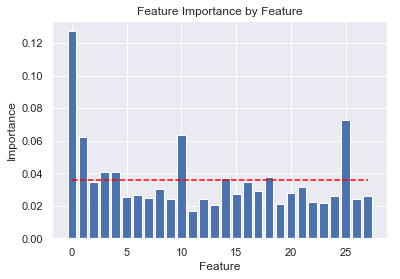

In [57]:
plt.bar(np.arange(len(clf.feature_importances_)),clf.feature_importances_)
plt.plot(np.arange(len(clf.feature_importances_)),[np.mean(clf.feature_importances_)]*len(clf.feature_importances_),'--',label='mean',color='red')
plt.title('Feature Importance by Feature')
plt.xlabel('Feature')
plt.ylabel('Importance')